# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

-Las zonas/barrios donde suele haber mayor compra/venta de propiedades

-Cantidad de ambientes

-Cantidad de habitaciones

-Si tiene balcon/patio

-Si tiene estacionamiento

-Cantidad de baños

-Si tiene vista a sitio de interés/zona céntrica o esta cercano a éste

-Si viene amueblado

-Ingresos aproximados de quienes viven y/o trabajan en la zona

-Seguridad de la zona

-Capacidad de reventa


Estos datos nos permiten conocer algunas características tanto del interior (cantidad de ambientes, dormitorios, etc) de la propiedad como del exterior (balcón, estacionamiento), así como otras características varias, como si la propiedad viene amueblada,  e ingresos de quienes viven/trabajan en la zona, etc.


### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
propiedades = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
print(propiedades.shape) #muestra la cantidad de filas y columnas
propiedades.head()

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
propiedades_aux = propiedades # este nuevo dataframe lo voy a usar para resolver el desafío 2.1

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
propiedades.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [5]:
propiedades.isnull().sum(axis = 0)

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [6]:
print(propiedades['property_type'].value_counts())
len(propiedades['property_type'].value_counts())

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


10

[Text(0, 0, 'Departamento'),
 Text(0, 0, 'PH'),
 Text(0, 0, 'Casa'),
 Text(0, 0, 'Lote'),
 Text(0, 0, 'Casa de campo'),
 Text(0, 0, 'Oficina'),
 Text(0, 0, 'Otro'),
 Text(0, 0, 'Local comercial'),
 Text(0, 0, 'Cochera'),
 Text(0, 0, 'Depósito')]

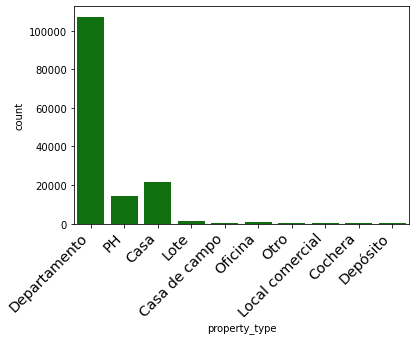

In [7]:
grafico_propiedades = sns.countplot(data = propiedades, x = 'property_type', color = 'green')
grafico_propiedades.set_xticklabels(grafico_propiedades.get_xticklabels(), rotation = 45,
                                     horizontalalignment = 'right', fontweight = 'light', fontsize = 'x-large')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Text(0.5, 1.0, 'Regiones l2')

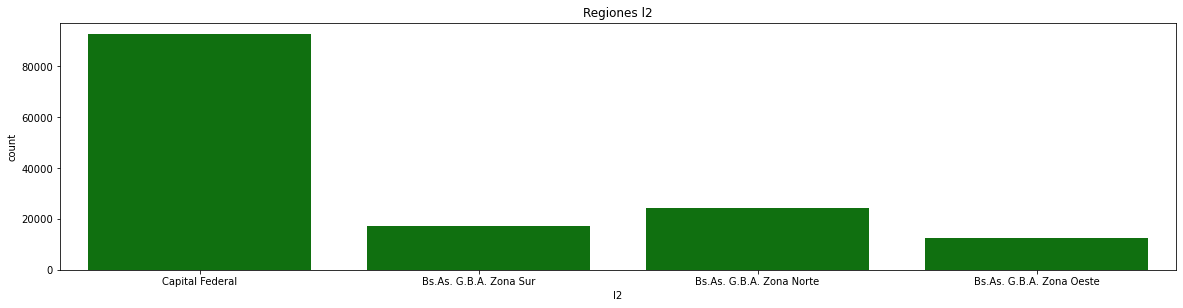

In [8]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
grafico = sns.countplot(data = propiedades, x = 'l2', color = 'green')
plt.title('Regiones l2')

In [9]:
propiedades

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


Text(0.5, 1.0, 'Regiones l3')

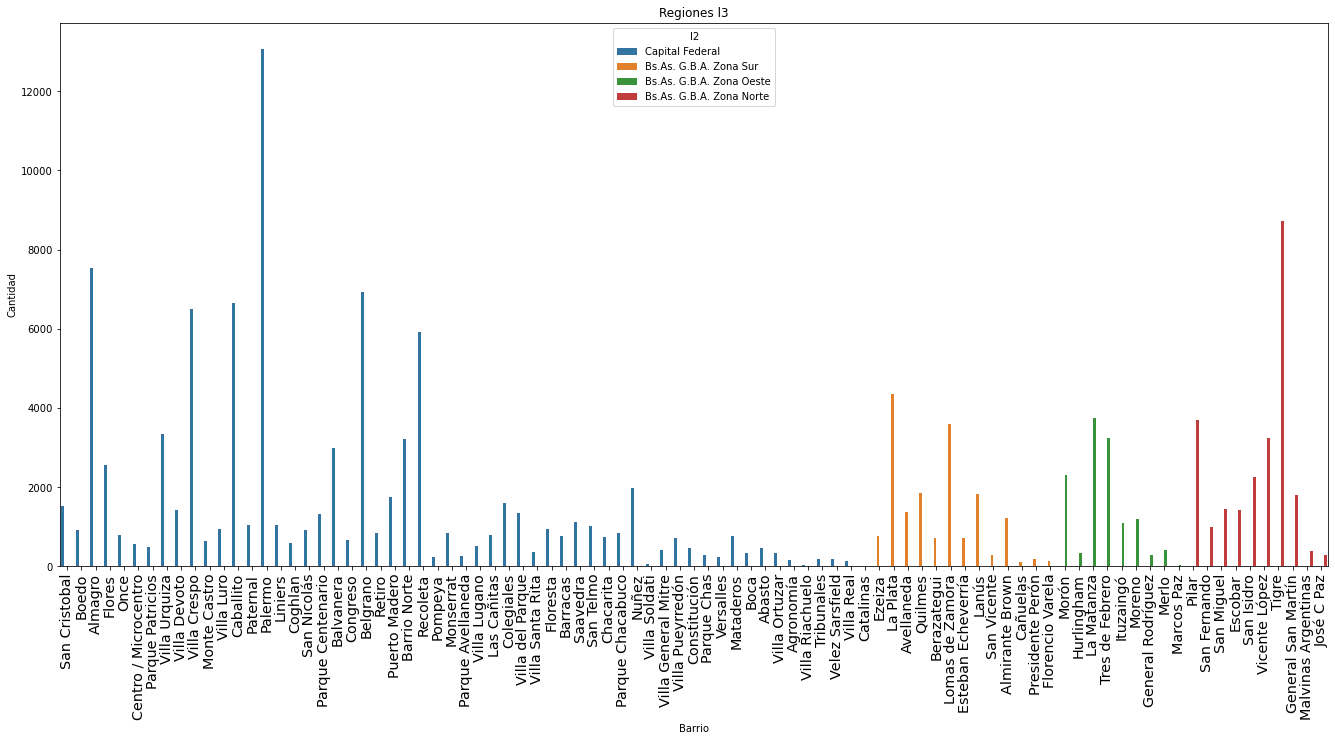

In [10]:
plt.figure(figsize = (50,10))
plt.subplot(1,2,2)
grafico = sns.countplot(data = propiedades.sort_values('l2', ascending=False), x = 'l3', hue='l2')
plt.xlabel('Barrio')
plt.ylabel('Cantidad')
grafico.set_xticklabels(grafico.get_xticklabels(), rotation = 90, fontsize='x-large')
plt.title('Regiones l3')

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [11]:
# los que cumplen las condiciones
tres_mas_abundantes = propiedades['property_type'].value_counts().head(3) # tres tipos de propiedad que mas aparecen
print(tres_mas_abundantes)
region_mas_abundante = propiedades['l2'].value_counts().head(1) # region con mas propiedades publicadas
region_mas_abundante

Departamento    107326
Casa             21521
PH               14298
Name: property_type, dtype: int64


Capital Federal    92539
Name: l2, dtype: int64

In [12]:
df_prop_nuevo = propiedades[propiedades.property_type.isin(['Departamento', 'Casa', 'PH']) & (propiedades['l2'] == 'Capital Federal')]
print(df_prop_nuevo.shape)

(91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

Antes de seguir, elimino los duplicados:

In [13]:
df_prop_nuevo = df_prop_nuevo.drop_duplicates()

In [14]:
# 1)
df_prop_nuevo.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,85493.000000,85479.000000,89874.000000,89874.000000,87727.000000,81157.000000,80850.000000,8.987400e+04
mean,-34.599089,-58.436074,2.965129,1.960456,1.558562,112.885494,95.169746,2.587195e+05
std,0.024042,0.036391,1.317503,1.074358,0.858386,989.133753,785.177443,3.190762e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613911,-58.459838,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599415,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584065,-58.409915,4.000000,3.000000,2.000000,111.000000,96.000000,2.782000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Valores que tienen poco sentido son por ejemplo, el minimo de 0 bedrooms y 1 de surface_covered (lo cual parecería no ser una propiedad), y el maximo de 26 rooms, 15 bedrooms, 14 baños, y 126062 de superficie.

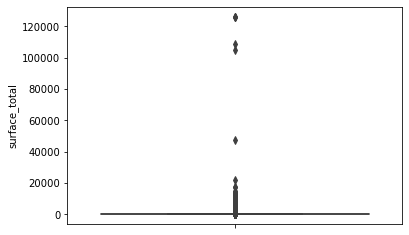

In [15]:
#2) y 3)
sns.boxplot(data = df_prop_nuevo, y = "surface_total")

Como todavía no puedo observar correctamente la "caja" sobre la cual está encerrado el 50% de los datos, voy a filtrar por un número menor

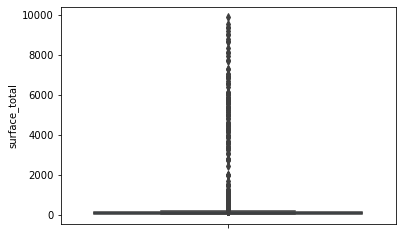

In [16]:
propiedades = df_prop_nuevo[df_prop_nuevo['surface_total'] < 10000]
sns.boxplot(data = propiedades, y = "surface_total")


Repito lo anterior

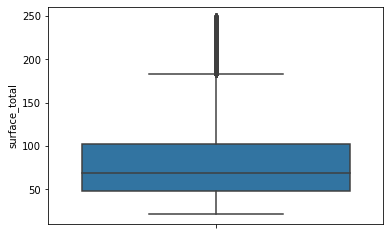

In [17]:
propiedades = df_prop_nuevo[(df_prop_nuevo['surface_total'] < 250) & (df_prop_nuevo['surface_total'] > 20)]
sns.boxplot(data = propiedades, y = "surface_total")

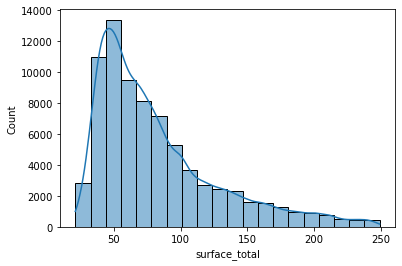

In [18]:
#hago histograma de surface_total
sns.histplot(propiedades['surface_total'], bins = 20, kde = True)

In [19]:
# 4
propiedades = propiedades[propiedades['surface_covered'] <= propiedades['surface_total']]

32434232.0 6000.0


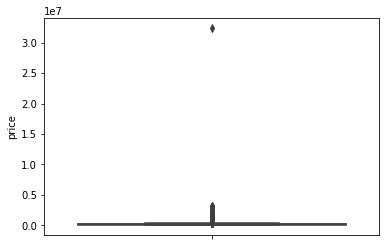

In [20]:
# 5
sns.boxplot(data = propiedades, y = "price")
print(propiedades['price'].max(), propiedades['price'].min())



Como vemos es necesario filtrar valores de modo tal que nos permita visualizar correctamente la "caja", así que básicamente repetimos el proceso que le aplicamos a la variable surface_total

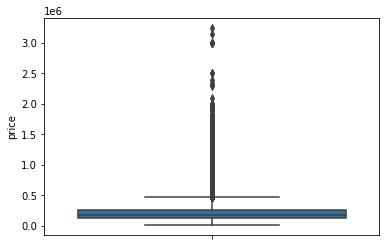

In [21]:
propiedades = propiedades[propiedades['price'] < 30000000.0]
sns.boxplot(data = propiedades, y = 'price')

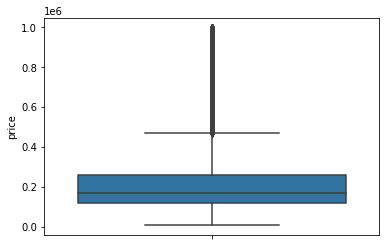

In [22]:
propiedades = propiedades[propiedades['price'] < 1000000.0]
sns.boxplot(data = propiedades, y = 'price')

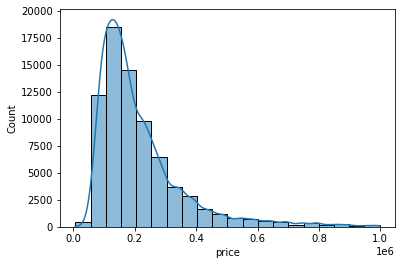

In [23]:
sns.histplot(propiedades['price'], bins = 20, kde = True)

En los histogramas, es notorio cómo la distribución de los datos forma una cola muy larga hacia la derecha.

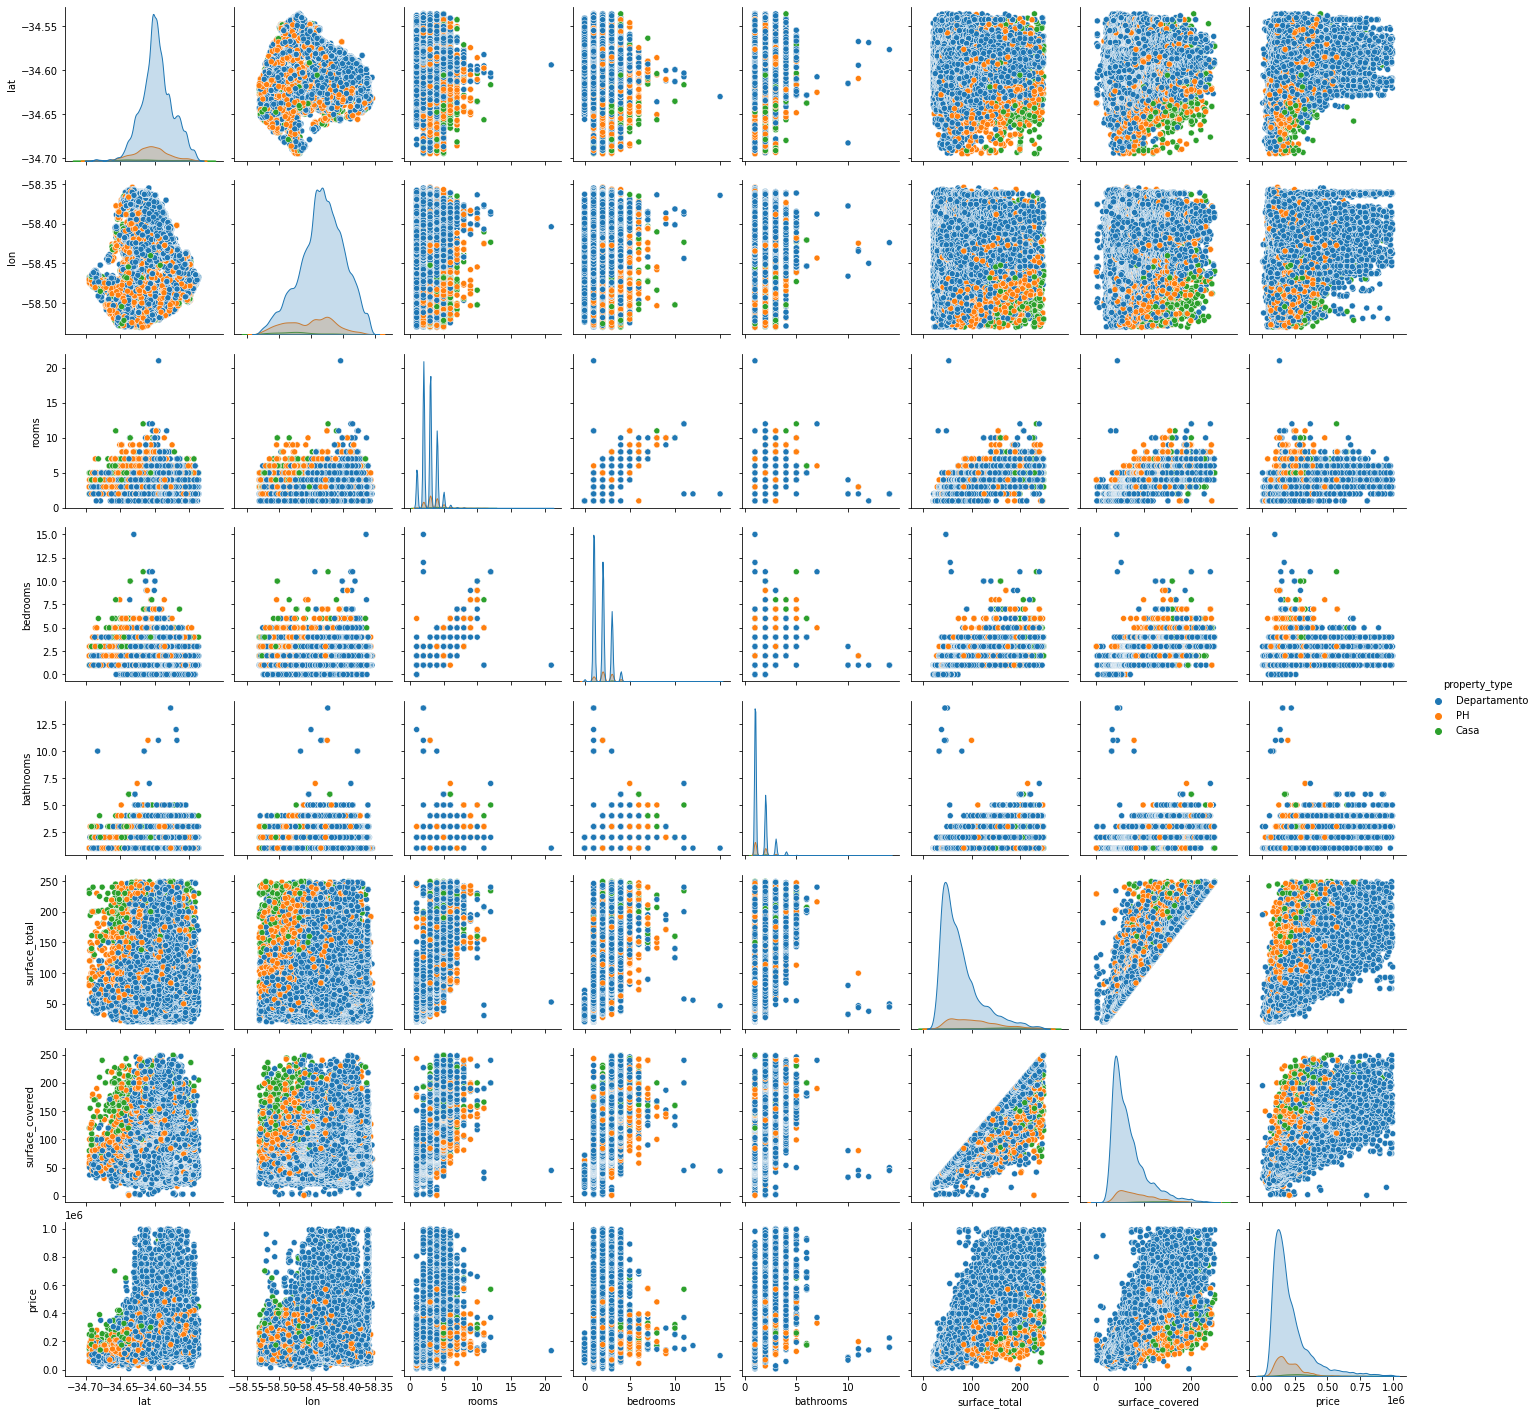

In [24]:
#6 una vez filtrado:
sns.pairplot(propiedades, hue='property_type')

Algunas conclusiones que se desprenden de este pairplot es que la mayoria de los departamentos cuesta entre 100mil y 250mil dolares, y en general el precio de laos ph es similar. Además, la amplia mayoría de las propiedades con 4 rooms/bedrooms o menos son departamentos. Con respecto a la superficie total y cubierta, las casas y PH suelen tener mas de 100 m2, mientras que se ve que hay departamentos grandes y chicos.
Con respecto al precio, podemos ver que la cantidad de departamentos es tan grande que abarca todo tipo de precios.
La diagonal trazada entre la superficie total y la cubierta, tiene que ver con la máscara que propusimos en la que la superficie total sea mayor a la cubierta.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [25]:
propiedades.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


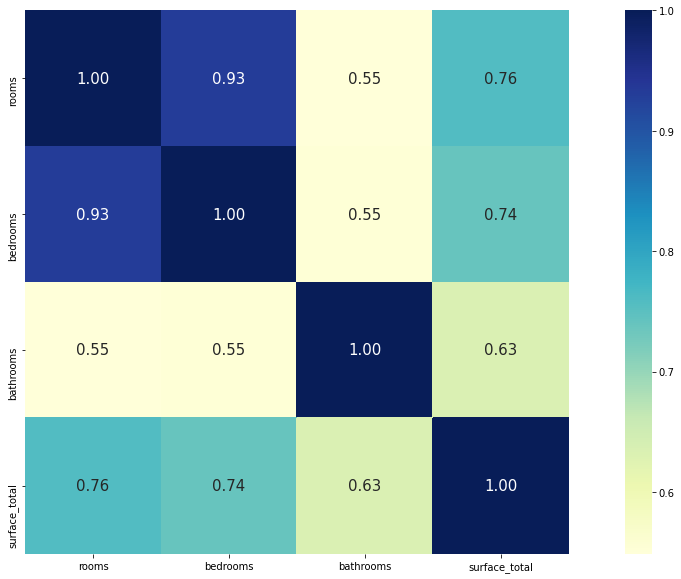

In [26]:
heatmap = propiedades.iloc[:,6:12].corr() #selecciono las columnas no categoricas
plt.figure(figsize=(20,10))
sns.heatmap(heatmap,square=True,annot=True, fmt='.2f',annot_kws={'size': 15},
            cmap='YlGnBu')

Correlaciones: Estudia la correlación entre las variables rooms, bedrooms, bathrooms, surface_total, surface_covered, price. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?


Vemos que las que mayor correlación tienen son la superficie total y cubierta para con el precio, por lo tanto son las mejores para predecirlo.

Las diferencias encontradas según el tipo de propiedad fue respondido en base al pairplot hecho anteriormente.



Mapa de los precios de las propiedades en Capital Federal:

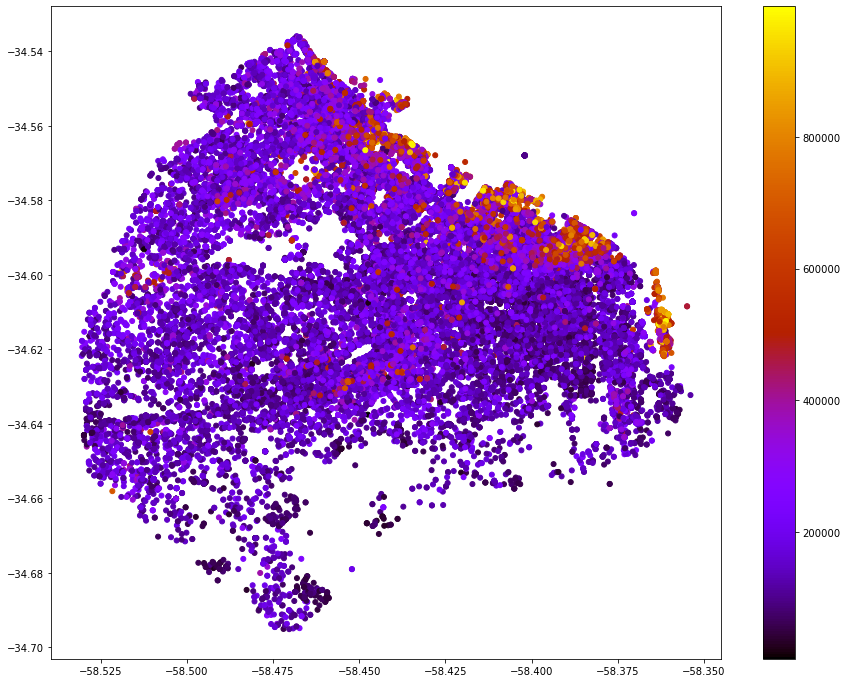

In [27]:
x = propiedades['lon']
y = propiedades['lat']

z = propiedades['price']
plt.figure(figsize=(15,12))

plt.scatter(x, y, c=z, s=25, cmap= 'gnuplot')
plt.colorbar()
plt.savefig('MapaCapitalFederal.png', dpi = 300)

Se ve como las propiedades mas caras están en Puerto Madero (extremo este del mapa) y en el corredor noreste.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


**¿Cuánto cuesta en promedio un departamento en el barrio mas caro de Capital Federal?**

Debemos saber que quizás nos falten datos (ademas de que el dataset está desactualizado), y puede que algunas propiedades no se publiquen por ese medio, por lo tanto el promedio que voy a obtener no es el real, pero sí permite estimarlo. Además puede que la información brindada por el dataset contenga errores (por ejemplo, existe una propiedad en Villa Riachuelo, uno de los barrios más baratos de Capital Federal, con información faltante y una sola habitación, que cuesta más de ** US$10 millones de dólares **

Para eso voy a calcular el valor promedio de una propiedad en cada barrio y así saber cuál es el barrio más caro.


In [28]:
propiedades_aux = propiedades[(propiedades['l2'] == 'Capital Federal') & (propiedades['property_type'] == 'Departamento')]

barrios = propiedades_aux.groupby('l3').price.mean()
barrios.sort_values(ascending=False, inplace=True)
print(barrios.head(3))

l3
Puerto Madero    556289.138158
Las Cañitas      380162.386513
Recoleta         318066.617937
Name: price, dtype: float64


Los 3 barrios más caros de Capital Federal son los expuestos arriba, y en promedio, un departamento en el barrio más caro (Puerto Madero) vale US$556289 aproximadamente.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [29]:
propiedades_ml = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

Realizando el filtrado propuesto, obtengo:

In [30]:
print(propiedades_ml.shape)
propiedades_ml = propiedades_ml[propiedades_ml['l2'] == 'Capital Federal']
propiedades_ml = propiedades_ml[propiedades_ml.property_type.isin(['Departamento', 'Casa', 'PH'])]
propiedades_ml = propiedades_ml[(propiedades_ml['surface_total'] <= 1000) & (propiedades_ml['surface_total'] >= 15)]
propiedades_ml = propiedades_ml[propiedades_ml['price'] <= 4000000]
propiedades_ml = propiedades_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
propiedades_ml = propiedades_ml.dropna()
print(propiedades_ml.shape)

(146660, 19)
(81019, 6)


Ahora sí procedo con la predicción del precio

In [31]:
X = propiedades_ml.drop(["price","rooms","bedrooms","bathrooms"], axis=1)
y = propiedades_ml.price

In [32]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

linear_model = LinearRegression() #será mi modelo benchmark
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42) # valor inicial de profundidad = 5
knn_regressor = KNeighborsRegressor(n_neighbors=2) # valor inicial de vecinos = 2

In [34]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

Las pendientes y la ordenada al origen son, según la regresión lineal:

In [35]:
print(linear_model.coef_, linear_model.intercept_)

[2532.65041154  130.64104315] 11306.046424181259


/home/mateo/Escritorio/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


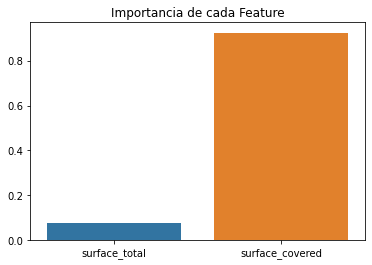

In [36]:
importances = tree_regressor.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

Según el gráfico, la superficie cubierta es muchísimo más importante para el modelo de regresión con árbol de decisión que la superficie total.

Las métricas elegidas serán el RMSE (Root Mean Squared Error) y el R2 score. La primera, para tener las mismas unidades y magnitudes que la variable 'precio', y la segunda, para obtener un coeficiente entre 0 y 1 (cuanto más cercano a 1, mejor regresor será).

Modelo: Regresión lineal -benchmark-
Raíz del error cuadrático medio en Train: 216278.7175940256
Raíz del error cuadrático medio en Test: 218957.05421795268
El puntaje r2 en Train es: 0.4714990135206788
El puntaje r2 en Test es: 0.47536093505669097


/home/mateo/Escritorio/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateo/Escritorio/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


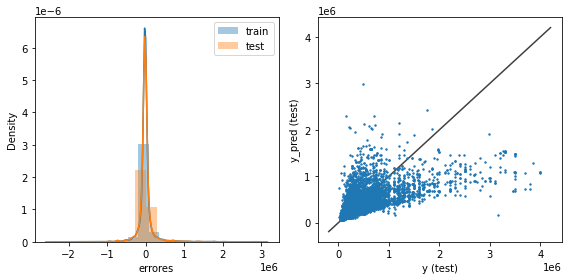

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 184390.64613636862
Raíz del error cuadrático medio en Test: 192596.7461603454
El puntaje r2 en Train es: 0.6158542762908089
El puntaje r2 en Test es: 0.5940798284663046


/home/mateo/Escritorio/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateo/Escritorio/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


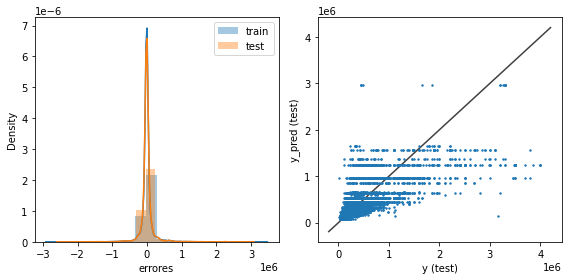

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 140449.275426141
Raíz del error cuadrático medio en Test: 179369.68433970425
El puntaje r2 en Train es: 0.7771271140401181
El puntaje r2 en Test es: 0.6479204261846319


/home/mateo/Escritorio/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateo/Escritorio/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


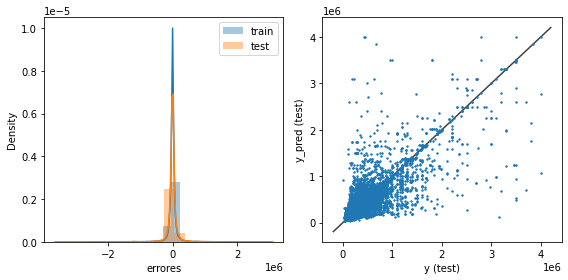

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

modelos = ['Regresión lineal -benchmark-', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"El puntaje r2 en Train es: {r2_train}")
    print(f"El puntaje r2 en Test es: {r2_test}")
    
    plt.figure(figsize = (8,4))
    
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

A nivel de métricas, el mejor se ajusta es el KNN, seguido del árbol de desición

Voy a averiguar cuál es la cantidad de hiperparametros que mejor predice el precio de las propiedades:

Optimizo para arbol de decisión:

In [38]:
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

for max_depth in max_depths:
        
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_score = r2_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_score = r2_score(y_test, y_test_pred)
    
    lista_accuracy_train.append(train_score)
    lista_accuracy_test.append(test_score)

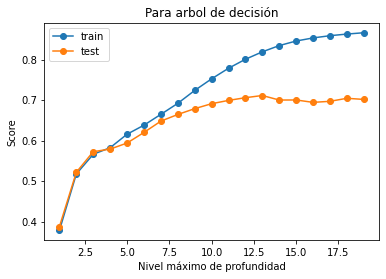

In [39]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train')
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.title("Para arbol de decisión")
plt.xlabel('Nivel máximo de profundidad')
plt.ylabel('Score')
plt.legend()

Diremos que un número óptimo como profundidad del árbol será 11, dado que entre 9 y 20, el desempeño es muy similar entre los valores del test. Con 11, se puede lograr un modelo que no tenga ni muy alto bias ni muy alta varianza y poder evitar el under y overfitting

Estas son las preguntas que se hace el arbol para decidir:

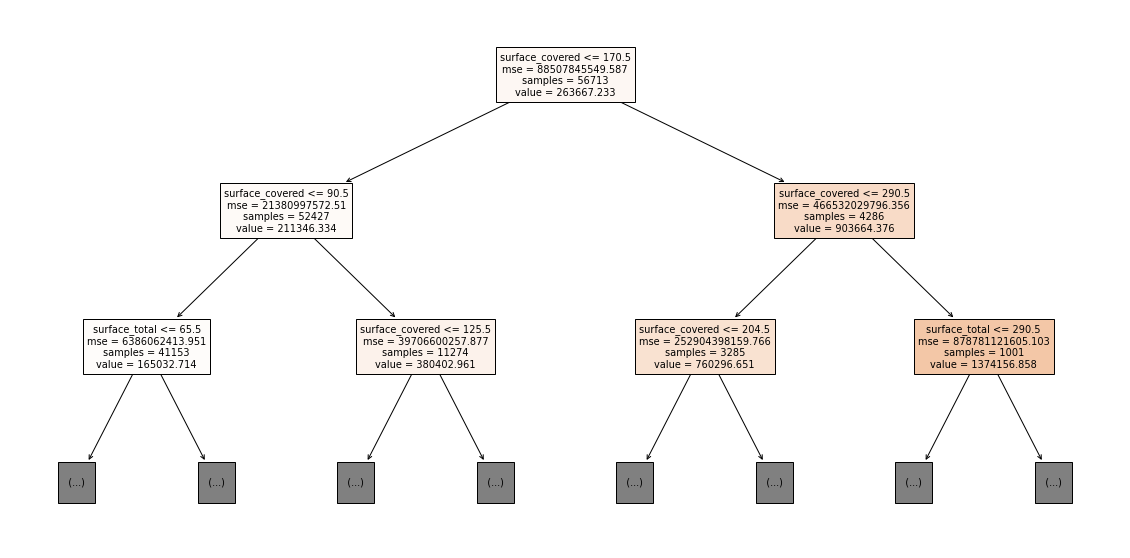

In [40]:
from sklearn import tree

plt.figure(figsize = (20,10))
tree.plot_tree(tree_regressor, max_depth = 2, filled = True, feature_names= X.columns)
plt.show() #solo muestro hasta la profundidad 2 para mejor visualización

Entonces, procedo a verificar qué tanto mejora el modelo de árbol de decisión con profundidad 11:

Modelo: Árbol de decisión optimizado
Raíz del error cuadrático medio en Train: 139947.4652112026
Raíz del error cuadrático medio en Test: 165742.90237368277
El puntaje r2 en Train es: 0.7787168708330163
El puntaje r2 en Test es: 0.6993836333899872


/home/mateo/Escritorio/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateo/Escritorio/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


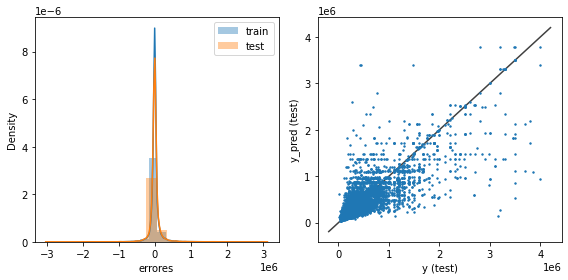

In [41]:
    arbol_optimizado = DecisionTreeRegressor(max_depth=11, random_state=42)
    arbol_optimizado.fit(X_train, y_train)
    y_train_pred = arbol_optimizado.predict(X_train)
    y_test_pred = arbol_optimizado.predict(X_test)
    
    print(f'Modelo: Árbol de decisión optimizado')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"El puntaje r2 en Train es: {r2_train}")
    print(f"El puntaje r2 en Test es: {r2_test}")
    
    plt.figure(figsize = (8,4))
    
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Mirando sólo el r2 score, pasó de 0.61 en Train y 0.59 en Test a 0.78 en Train y 0.7 en Test, y también disminuyó el error con la métrica RMSE.

Optimizo para k-vecinos:

In [42]:
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35]

for k in k_vecinos:
    
    clf = KNeighborsRegressor(n_neighbors=k)
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_score = r2_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_score = r2_score(y_test, y_test_pred)
    
    lista_accuracy_train.append(train_score)
    lista_accuracy_test.append(test_score)

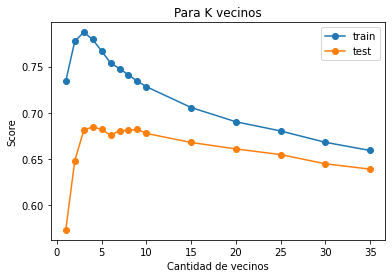

In [43]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train')
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.title("Para K vecinos")
plt.xlabel('Cantidad de vecinos')
plt.ylabel('Score')
plt.legend()

Diremos que un número óptimo de vecinos será 3, dado que a partir de 5, los desempeños en el train y el test empeoran.

Procedo a hacer lo mismo pero para 3 vecinos en el KNN:

Modelo: KNN optimizado
Raíz del error cuadrático medio en Train: 137288.42063681452
Raíz del error cuadrático medio en Test: 170764.2583661817
El puntaje r2 en Train es: 0.7870458791092017
El puntaje r2 en Test es: 0.680892732769403


/home/mateo/Escritorio/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateo/Escritorio/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


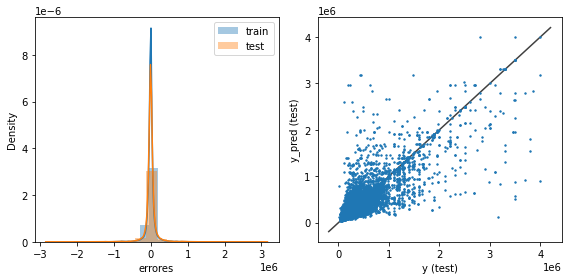

In [44]:
    knn_optimizado = KNeighborsRegressor(n_neighbors=3)
    knn_optimizado.fit(X_train, y_train)
    y_train_pred = knn_optimizado.predict(X_train)
    y_test_pred = knn_optimizado.predict(X_test)
    
    print(f'Modelo: KNN optimizado')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print(f"El puntaje r2 en Train es: {r2_train}")
    print(f"El puntaje r2 en Test es: {r2_test}")
    
    plt.figure(figsize = (8,4))
    
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En este caso, también mejoró el r2 score, quedando ahora en 0.79 para train y 0.68 para test. Asimismo, el RMSE también disminuyó ligeramente.

Conclusiones:

Si tuviera que eligir un solo modelo para utilizar, me quedaría con el knn por tener un mejor desempeño. Asimismo, es un modelo simple e intuitivo, y tiene la ventaja de poder poner a prueba mi hipótesis de usar las coordenadas. De todas formas, tanto el modelo de árbol de decisión como el knn, obtuvieron mejor resultado que mi modelo benchmark (regresión lineal).

Con respecto a cómo mejorar el modelo, yo creo que faltarían algunos datos ya que no creo que solamente influya la superficie a la hora de averiguar el precio de una propiedad. Según el heatmap mostrado previamente, la cantidad de ambientes, baños y habitaciones no parece tener una correlación fuerte con el precio, pero sí la superficie. Pero sí puede haber ciertos barrios/zonas comerciales en auge, barrios privados, antiguedad de la propiedad (o si fue remodelada), tipo de material con la que está construida, índice de criminalidad de la zona, cercanía a oficinas/polos tecnológico-audiovisual, etc. Con que al menos se haya agregado alguno de estos datos, creo que se podría alcanzar un mejor resultado.

En cuanto a la información que no estoy usando, pueden servir las coordenadas geográficas. Se podría armar un modelo de k vecinos en donde el precio de una propiedad se parezca al precio de la propiedad de su vecino. Además podria probar si corresponde agregar algún feature más, por más que la correlación con el precio no sea tan alta. 

<!-- Por suerte, acerté con el número de vecinos más óptimo, pero aún quiero saber qué tan bien funciona mi modelo de arbol de decisión con, como máximo, 10 como profundidad -->